<a href="https://colab.research.google.com/github/Bhar8at/DLR/blob/main/final_downsizing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📁 Please upload the zipped CT image folder


Saving FILTERED_BRAIN_CT_ZIPPED.zip to FILTERED_BRAIN_CT_ZIPPED.zip
📁 Now upload the zipped sinogram folder


Saving raw_sinograms_ZIPPED.zip to raw_sinograms_ZIPPED.zip
🔧 Resizing CT images to 64x64...


100%|██████████| 125/125 [00:00<00:00, 261.46it/s]


🔧 Resizing sinograms to 90x128...


100%|██████████| 125/125 [00:00<00:00, 261.84it/s]


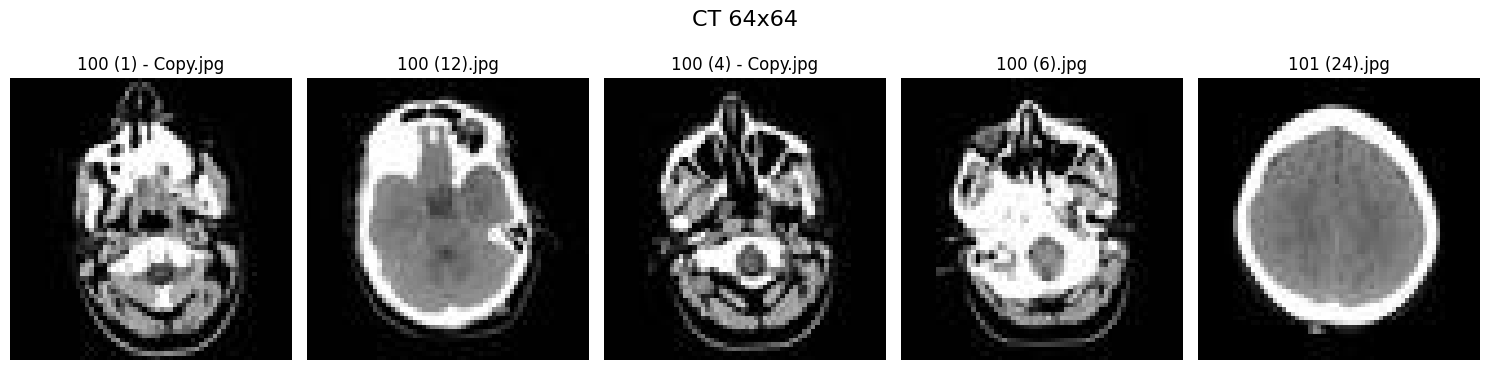

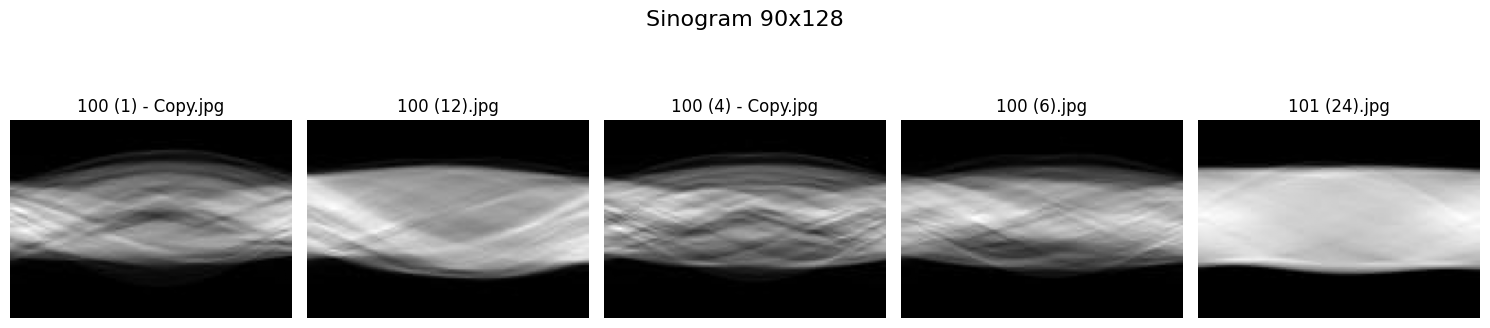

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# IMPORTS
import os
import zipfile
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files
from tqdm import tqdm
import shutil

# UPLOAD ZIPPED CT AND SINOGRAM IMAGE FOLDERS
print("📁 Please upload the zipped CT image folder")
ct_zip = files.upload()

print("📁 Now upload the zipped sinogram folder")
sino_zip = files.upload()

# UNZIP INTO TEMPORARY DIRECTORIES
def unzip(zip_name, extract_to):
    with zipfile.ZipFile(zip_name, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

os.makedirs("unzipped_cts", exist_ok=True)
os.makedirs("unzipped_sinos", exist_ok=True)

ct_zip_name = list(ct_zip.keys())[0]
sino_zip_name = list(sino_zip.keys())[0]

unzip(ct_zip_name, "unzipped_cts")
unzip(sino_zip_name, "unzipped_sinos")

# HANDLE NESTED FOLDERS
def find_inner_folder(parent):
    inner = os.listdir(parent)
    if len(inner) == 1 and os.path.isdir(os.path.join(parent, inner[0])):
        return os.path.join(parent, inner[0])
    return parent

ct_folder = find_inner_folder("unzipped_cts")
sino_folder = find_inner_folder("unzipped_sinos")

# RESIZE TO GIVEN SIZE
def resize_images(input_folder, output_folder, size):
    os.makedirs(output_folder, exist_ok=True)
    count = 0
    for fname in tqdm(sorted(os.listdir(input_folder))):
        if fname.lower().endswith((".jpg", ".png")):
            try:
                img = Image.open(os.path.join(input_folder, fname)).convert("L")
                img_resized = img.resize(size, Image.BICUBIC)
                img_resized.save(os.path.join(output_folder, fname))
                count += 1
            except Exception as e:
                print(f"❌ Failed on {fname}: {e}")
    return count

# RESIZE CTs TO 64x64 AND SINOGRAMS TO 128x90
ct_out = "resized_cts_64x64"
sino_out = "resized_sinos_180x64"

print("🔧 Resizing CT images to 64x64...")
resize_images(ct_folder, ct_out, (64, 64))

print("🔧 Resizing sinograms to 90x128...")
resize_images(sino_folder, sino_out, (180, 64))  # width x height

# SHOW A FEW SAMPLE IMAGES AFTER RESIZING
def show_samples(folder, title, n=5):
    files = sorted([f for f in os.listdir(folder) if f.endswith(".jpg") or f.endswith(".png")])[:n]
    fig, axs = plt.subplots(1, len(files), figsize=(15, 4))
    fig.suptitle(title, fontsize=16)
    for ax, fname in zip(axs, files):
        img = Image.open(os.path.join(folder, fname))
        ax.imshow(img, cmap="gray")
        ax.set_title(fname)
        ax.axis("off")
    plt.tight_layout()
    plt.show()

show_samples(ct_out, "CT 64x64")
show_samples(sino_out, "Sinogram 90x128")

# ZIP RESIZED FOLDERS
shutil.make_archive("CT_64x64_RESIZED", 'zip', ct_out)
shutil.make_archive("Sino_180x64_RESIZED", 'zip', sino_out)

# DOWNLOAD ZIPS
files.download("CT_64x64_RESIZED.zip")
files.download("Sino_180x64_RESIZED.zip")
